### Topic Modelling with BERTopic

#### Imports

In [1]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

c:\dev\getfocus_assignment\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Load Data 

In [2]:
df = pd.read_csv('./output_data/modified_case_data.csv')
abstracts = df['abstract'].tolist()

#### Load Embeddings

##### Embedding model: stella_en_400M_v5 (MTEB Clustering Category rank 4)

In [3]:
# Load the DataFrame from the CSV file
embeddings = pd.read_csv('./embeddings/stella_en_400M_v5.csv')

# Extract embeddings
document_ids = embeddings['ucid'].values
embeddings_loaded = embeddings.drop('ucid', axis=1).values


#### Initialize Vectorizer

In [4]:
vec_model = CountVectorizer(min_df=2,stop_words='english', ngram_range=(1,2))

#### Initialize BERTopic()

In [5]:
topic_model = BERTopic(vectorizer_model=vec_model)

### Calculate topics (embedding: stella_en_400M_v5)

In [6]:
topics, probs = topic_model.fit_transform(abstracts, embeddings_loaded)

#### Update topic model for fine tuning

In [19]:
topic_model.update_topics(abstracts, vectorizer_model=vec_model)

#### Get Topic Info

In [11]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,23562,-1_power_engine_motor_vehicle,"[power, engine, motor, vehicle, control, speed...",[To provide a vehicle control device capable o...
1,0,1006,0_oil_oil pump_pump_electric oil,"[oil, oil pump, pump, electric oil, lubricatin...",[[PROBLEMS] To control the oil pump while accu...
2,1,971,1_planet_row_planet row_gear ring,"[planet, row, planet row, gear ring, planet ca...",[The utility model discloses a hybrid power sy...
3,2,813,2_electric machine_machine_hybrid drive_drive ...,"[electric machine, machine, hybrid drive, driv...",[Hybrid drive train for a hybrid-driven vehicl...
4,3,763,3_planetary gear_planetary_gear set_ring gear,"[planetary gear, planetary, gear set, ring gea...",[The present invention relates to a hybrid tra...
...,...,...,...,...,...
433,432,10,432_152_transmission 18_source 12_14 operable,"[152, transmission 18, source 12, 14 operable,...",[Selection system of a vehicular traction mode...
434,433,10,433_refrigerator_natural gas_natural_dualfuel,"[refrigerator, natural gas, natural, dualfuel,...",[The invention discloses a hybrid power refrig...
435,434,10,434_fuel cell_cell_combustible_ethanol,"[fuel cell, cell, combustible, ethanol, fuel, ...",[A vehicle has an internal-combustion engine d...
436,435,10,435_generating machine_torque generating_decou...,"[generating machine, torque generating, decoup...",[A control method of a variable speed electric...


In [9]:
topic_model.get_representative_docs(-1)

['To provide a vehicle control device capable of suppressing wasteful consumption of electric energy.  An engine having an output shaft for outputting engine torque to be transmitted to drive wheels, an electric motor coupled to the output shaft of the engine, and transmitting the engine torque between the output shaft and the drive wheels. A control apparatus for a vehicle, comprising: a clutch mechanism capable of switching between a transmission state to be transmitted and a cutoff state to block transmission of the engine torque; and a rotation speed detection means for detecting the rotation speed of the engine, When the engine speed detected by the means decreases with time, it is determined whether or not the motor torque of the electric motor is generated and applied to the output shaft of the engine according to the speed at which the engine speed decreases. To do.  An engine having an output shaft for outputting engine torque to be transmitted to drive wheels, an electric mot

In [13]:
topic_model.get_document_info(abstracts)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,A hydraulic regenerative braking and power sup...,-1,-1_power_motor_engine_vehicle,"[power, motor, engine, vehicle, control, drivi...",[PROBLEM TO BE SOLVED: To provide a power syst...,power - motor - engine - vehicle - control - d...,0.000000,False
1,"Higher, the lower planet row plug-in hybrid-po...",242,242_firmly_planet_second planet_planet carrier,"[firmly, planet, second planet, planet carrier...",[The invention provides a plug-in hybrid elect...,firmly - planet - second planet - planet carri...,0.382050,False
2,The traction arrangement comprises one or more...,-1,-1_power_motor_engine_vehicle,"[power, motor, engine, vehicle, control, drivi...",[PROBLEM TO BE SOLVED: To provide a power syst...,power - motor - engine - vehicle - control - d...,0.000000,False
3,A dual-motor hybrid power driving system compr...,34,34_doublemotor_doubleclutch_doublemotor hybrid...,"[doublemotor, doubleclutch, doublemotor hybrid...",[A longitudinally-arranged double-motor hybrid...,doublemotor - doubleclutch - doublemotor hybri...,1.000000,False
4,FIELD: transport.SUBSTANCE: hybrid transmissio...,18,18_planetary_ring gear_planetary gear_sun,"[planetary, ring gear, planetary gear, sun, ge...",[The invention relates to a drive assembly for...,planetary - ring gear - planetary gear - sun -...,0.943838,False
...,...,...,...,...,...,...,...,...
46661,A battery arrangement for a motor vehicle incl...,-1,-1_power_motor_engine_vehicle,"[power, motor, engine, vehicle, control, drivi...",[PROBLEM TO BE SOLVED: To provide a power syst...,power - motor - engine - vehicle - control - d...,0.000000,False
46662,The invention relates to a method for operatin...,73,73_trailer_tractor_semitrailer_heavyduty,"[trailer, tractor, semitrailer, heavyduty, tru...",[A trailer for a vehicle with a high voltage t...,trailer - tractor - semitrailer - heavyduty - ...,0.262939,False
46663,A torsional vibration damping system (7) for a...,12,12_damper_torsional_torsional vibration_vibrat...,"[damper, torsional, torsional vibration, vibra...","[Torsional vibration damper (100, 200), in par...",damper - torsional - torsional vibration - vib...,1.000000,False
46664,Various methods and systems are provided for a...,13,13_gear set_element_planetary gear_planetary,"[gear set, element, planetary gear, planetary,...","[Transmission (G) for a motor vehicle, compris...",gear set - element - planetary gear - planetar...,0.682977,False


#### Reduce outliers

In [10]:
# Reduce outliers
new_topics = topic_model.reduce_outliers(abstracts, topics, strategy='distributions')

In [11]:
topic_model.update_topics(abstracts, topics=new_topics)


2024-08-10 20:07:01,708 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


#### Approximate Distributions

In [12]:
topic_distr, _ = topic_model.approximate_distribution(abstracts)

In [14]:
topic_model.visualize_distribution(topic_distr[0])


#### Visualize max probabilities

In [17]:
max_probs = {} # {doc: max_prob}
for i in range(len(topic_distr)):
    max_probs[i] = max(topic_distr[i])

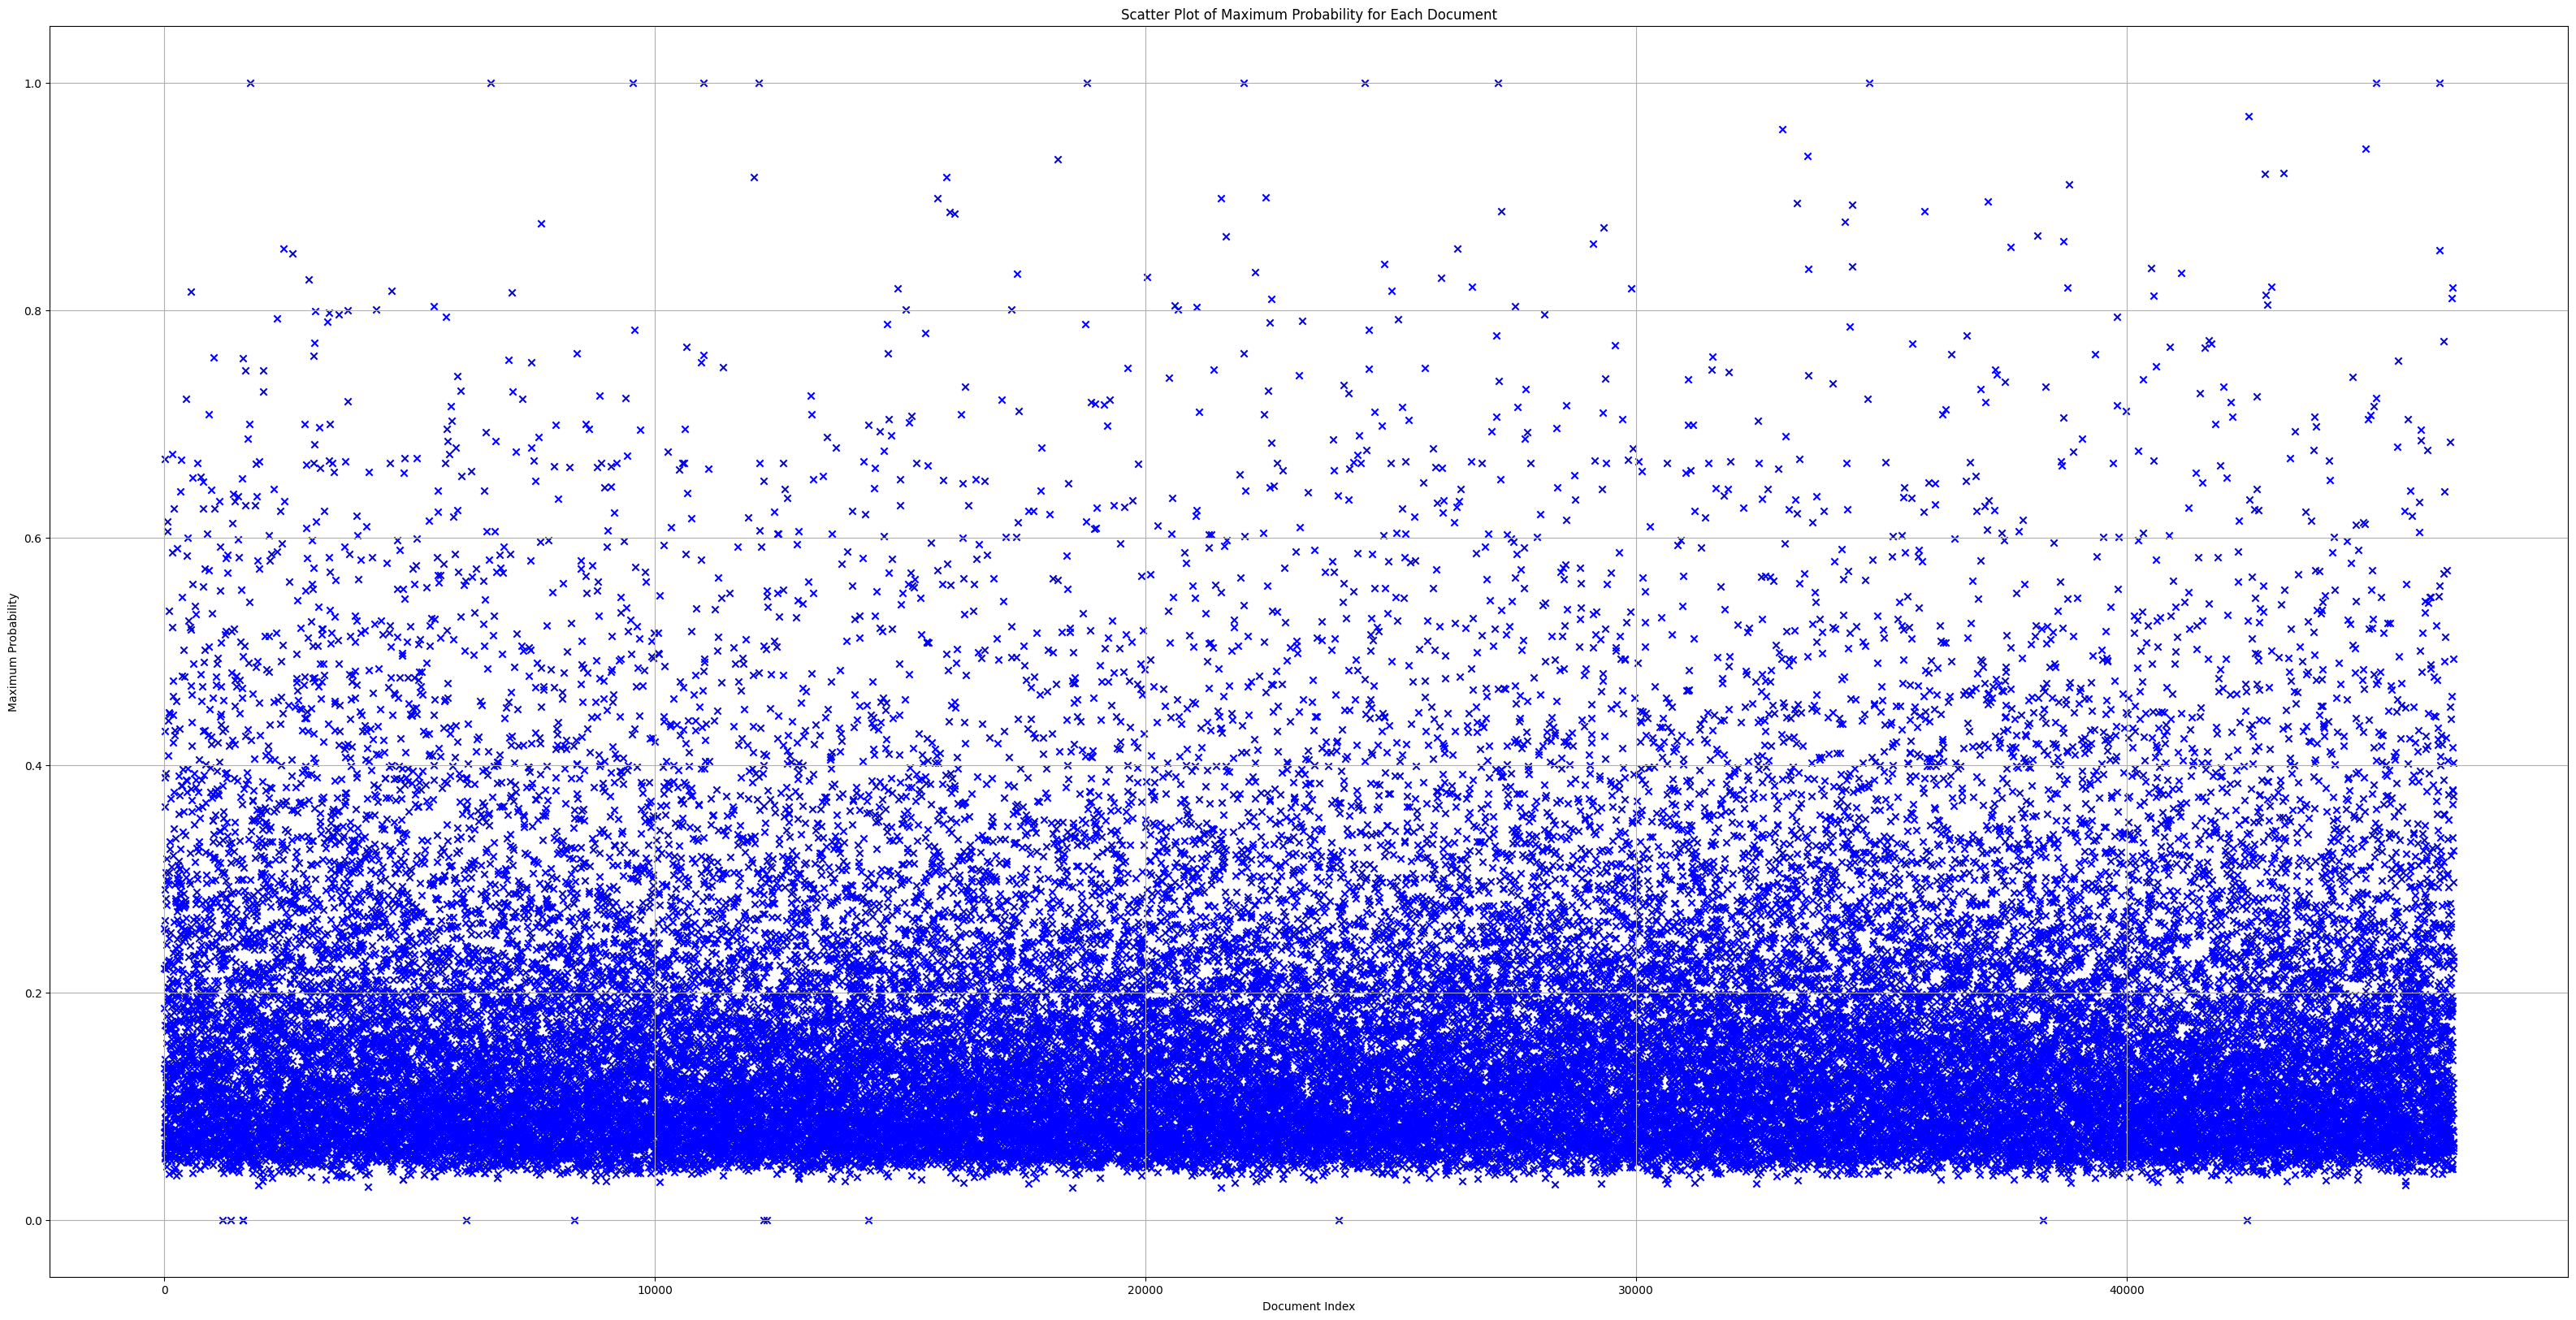

In [22]:
import matplotlib.pyplot as plt

# Assuming max_probs is a dictionary {doc_index: max_prob}
doc_indices = list(max_probs.keys())
max_probabilities = list(max_probs.values())

plt.figure(figsize=(40, 20))
plt.scatter(doc_indices, max_probabilities, color='b', marker='x')

plt.xlabel('Document Index')
plt.ylabel('Maximum Probability')
plt.title('Scatter Plot of Maximum Probability for Each Document')
plt.grid(True)
plt.show()


#### Predict a new document

In [ ]:
new_doc = 'The invention provides a controller for an advanced hybrid vehicle that enhances the vehicle\'s energy efficiency and power management by optimizing the use of both electric and combustion power sources. The controller ensures optimal battery usage, prevents overcharging, and improves acceleration performance while minimizing fuel consumption.Background:Hybrid vehicles typically utilize a combination of an internal combustion engine (ICE) and electric motors to provide driving force. Efficient management of these power sources is crucial for maximizing fuel economy and ensuring the longevity of the battery. This invention addresses the need for a more advanced control system that can seamlessly manage the transition between electric and combustion power, improve acceleration performance, and prevent unnecessary fuel consumption.'

In [ ]:
topic_model.transform(new_doc)